# Autocorrelation 

In [114]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

earthquake = pd.read_csv("Earthquakes.csv")
print(earthquake)

     Year  Quakes
0    1916       2
1    1917       5
2    1918      12
3    1919       8
4    1920       7
..    ...     ...
101  2017       7
102  2018      17
103  2019       9
104  2020       9
105  2021      19

[106 rows x 2 columns]


In [115]:
earthquake.dtypes

Year      int64
Quakes    int64
dtype: object

In [116]:
earthquake["Quakes"]=earthquake["Quakes"].astype(float)

## Autocorrelation

One thing we talked about during the lectures is the concept of autocorrelation. We said that one of the assumptions for our calculation of the model parameter's confidence intervals is that the data should be independent. Often engineering is NOT independent as it is gathered in time. One data point is then likely to be correlated with the value before it. We discussed how autocorrelation can be checked using an autocorrelation plot. `Matplotlib` offers a convenient way to plot the autocorrelation function using the `acorr` method. Let's see an example below to test if our z value is autocorrelated. The number of lags to show on the plot can be specified with the `maxlags` argument. Let's show 6 lag values.

Let yt = the annual number of worldwide earthquakes with magnitude greater than 7 on the Richter scale since 2017 years (Earthquakes.csv data obtained from https://earthquake.usgs.gov)

<AxesSubplot:xlabel='Year', ylabel='Quakes'>

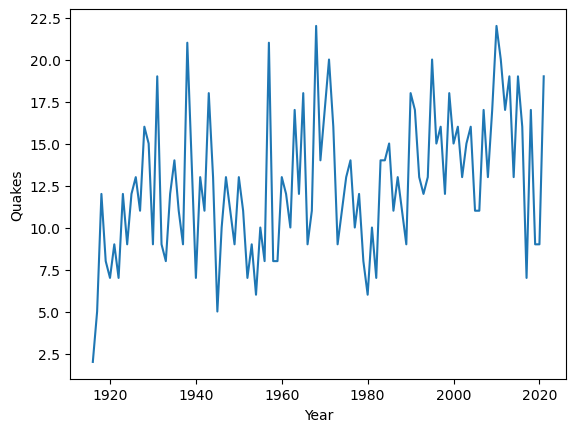

In [117]:
sns.lineplot(x="Year",y="Quakes",data=earthquake)

In [118]:
QuakesA=(earthquake['Quakes']-np.mean(earthquake['Quakes']))

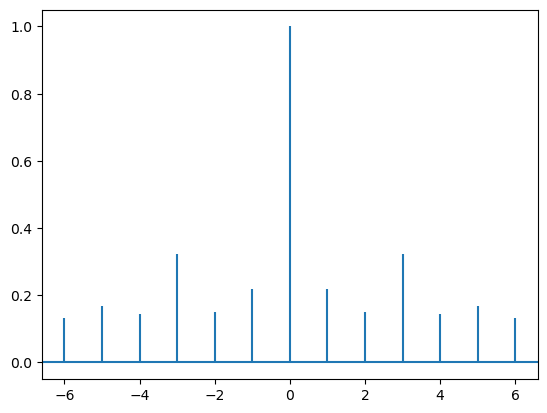

In [119]:
import matplotlib.pyplot as plt
plt.acorr(QuakesA, maxlags=6)
plt.show()

By default `matplotlib` shows two sided autocorrelation plot. We're only interested in the right side so let's change our x-limits on the plot to only show the right side. The x limits of the plot can be specified using the `xlim` option. 

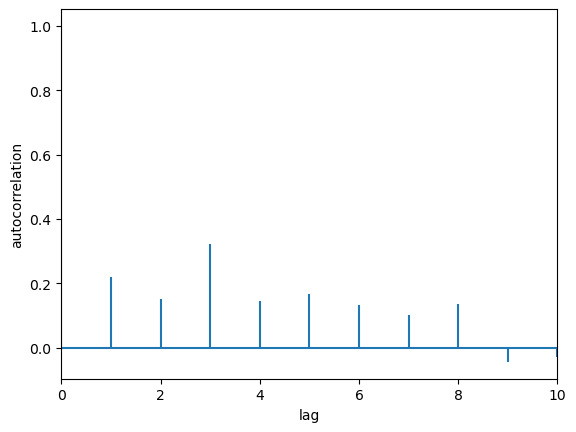

In [120]:
plt.acorr(QuakesA, maxlags=10)
plt.xlim([0,10])
plt.xlabel("lag")
plt.ylabel("autocorrelation")
plt.show()

In this example the data seems to be autocorrelated. Least Squares regression models are pretty robust to violations of our assumptions. The relationship between the points and the past time series has a strong positive nature. The present time series observation is highly correlated with older time series observations.  

For the autocorrelation correlogram, we will show the degreee of correlation between the observation and the observations own lagged value. This can help to find the autoregression that may be chosen to try to fix the autocorrealtion.   

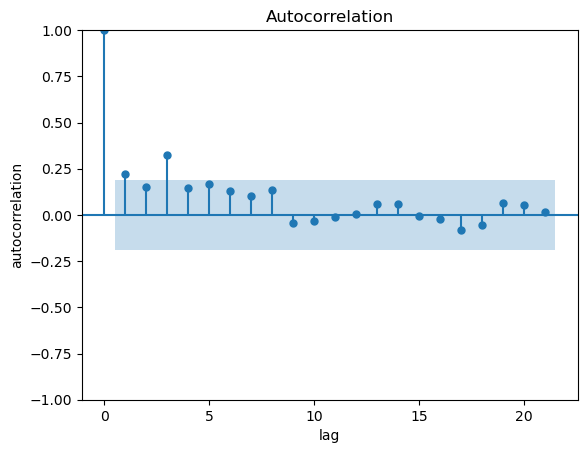

In [121]:
plot_acf(earthquake["Quakes"],bartlett_confint=False)
plt.xlabel("lag")
plt.ylabel("autocorrelation")
plt.show()

In [122]:
earthquakeW = pd.read_csv("EarthquakesWorking.csv")
print(earthquakeW)

     Year  Quakes  QuakesLag1  QuakesLag2  QuakesLag3  QuakeLag4
0    1916       2         5.0        12.0         8.0        7.0
1    1917       5        12.0         8.0         7.0        9.0
2    1918      12         8.0         7.0         9.0        7.0
3    1919       8         7.0         9.0         7.0       12.0
4    1920       7         9.0         7.0        12.0        9.0
..    ...     ...         ...         ...         ...        ...
101  2017       7        17.0         9.0         9.0       19.0
102  2018      17         9.0         9.0        19.0        NaN
103  2019       9         9.0        19.0         NaN        NaN
104  2020       9        19.0         NaN         NaN        NaN
105  2021      19         NaN         NaN         NaN        NaN

[106 rows x 6 columns]


In [123]:
earthquakeW.corr()

,Year,Quakes,QuakesLag1,QuakesLag2,QuakesLag3,QuakeLag4
Year,1.000000,0.394047,0.369146,0.348861,0.350672,0.337918
Quakes,0.394047,1.000000,0.228987,0.159531,0.344766,0.157071
QuakesLag1,0.369146,0.228987,1.000000,0.192069,0.159762,0.327906
QuakesLag2,0.348861,0.159531,0.192069,1.000000,0.191826,0.141131
QuakesLag3,0.350672,0.344766,0.159762,0.191826,1.000000,0.191036
QuakeLag4,0.337918,0.157071,0.327906,0.141131,0.191036,1.000000


Take every 2nd value to run autoregression (3rd order autoregression). 

In [146]:
earthquakeW2=earthquakeW["Quakes"]
earthquakeW2
earthquakeW2=earthquakeW2.iloc[::2,]
#earthquakeW2

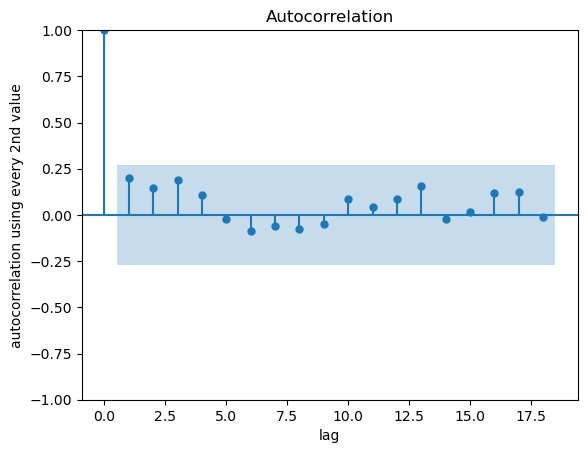

In [148]:
plot_acf(earthquakeW2,bartlett_confint=False)
plt.xlabel("lag")
plt.ylabel("autocorrelation using every 2nd value")
plt.show()